This code processes a set of images and then returns the average of the images 
and first set of principal components

In [ ]:
from PIL import Image
from numpy import *
from pylab import *

import os

#Returns the files in the filepath
def getim_list(path):
    return[os.path.join(path,f) for f in os.listdir(path) if f.endswith('jpg')]

pathlist='filepath'

imlist=getim_list(pathlist)

#Removes the smaller images where there is no streetview image
imlist2=[]
for im in imlist:
    if os.stat(im).st_size> 8923:
     imlist2.append(im)

#Loops through the first 4000 images and flattens them into an array
#The convert('L') switches it into black and white
immatrix=array([array(Image.open(im).convert('L')).flatten() for im in imlist2[1:4000]], 'f') 



############################################################################################
#The pca function
def pca(X):
# Principal Component Analysis
# input: X, matrix with training data stored as flattened arrays in rows
# return: projection matrix (with important dimensions first), variance and mean.

# get dimensions
 num_data,dim = X.shape
# center data
 mean_X = X.mean(axis=0)
 X = X - mean_X #Subtracts the mean
 if dim>num_data:
 # PCA - compact trick used
   M = dot(X,X.T) # covariance matrix
   e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
   tmp = dot(X.T,EV).T 
   V = tmp[::-1] # reverse since last eigenvectors are the ones we want
   S = sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
   for i in range(V.shape[1]):
     V[:,i] /= S
 else:
  U,S,V = linalg.svd(X)
  V = V[:num_data] # only makes sense to return the first num_data
# return the projection matrix, the variance and the mean
 return V,S,mean_X

################################################################################################
#Gets the size of the first image
im=array(Image.open(imlist[0]))
m,n=im.shape[0:2]  #640 by 640 for streetview

#Calculates the pca analysis                
V,S,immean=pca(immatrix)

print V.shape

figure()
gray()
#sublot five rows, four columns and the first picture which is the average image
subplot(5,4,1)
#Converts the image back to picture shape and plots the mean picture
imshow(immean.reshape(m,n))

for i in range(19):
    subplot(5,4,i+2) #Plots the first 19 principal components
    imshow(V[i].reshape(m,n))

show()

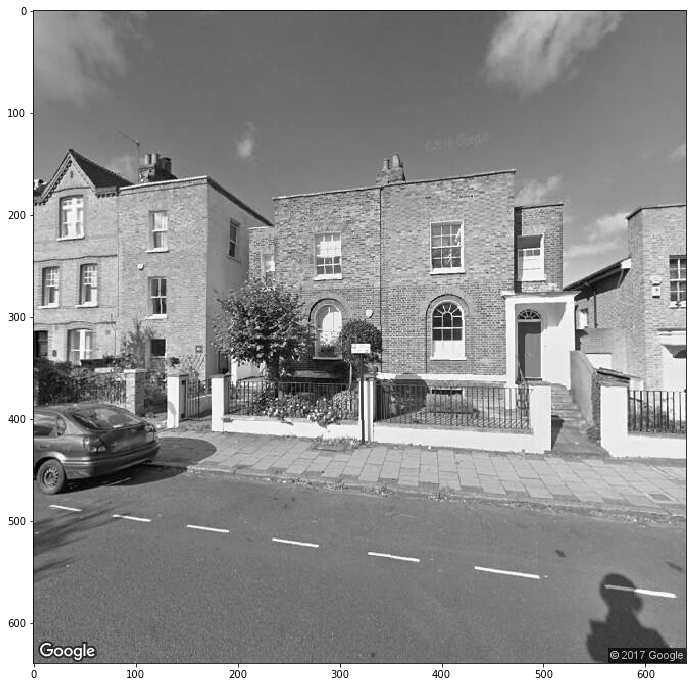

In [2]:
#Sends the data back to the square shape
plt.figure(figsize=(12,12))
plt.imshow(immatrix[1000].reshape(m,n))
show()

This computes a series of approximations to the image above based on an increasing number of principal components

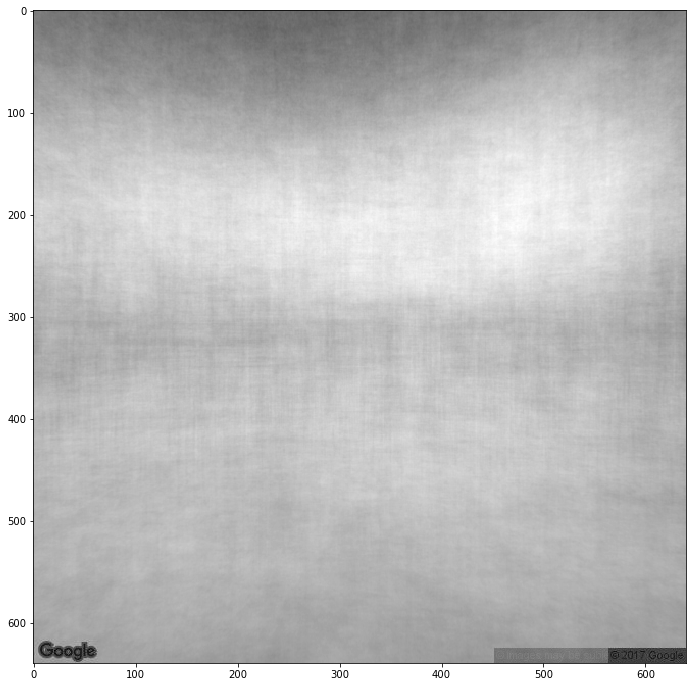

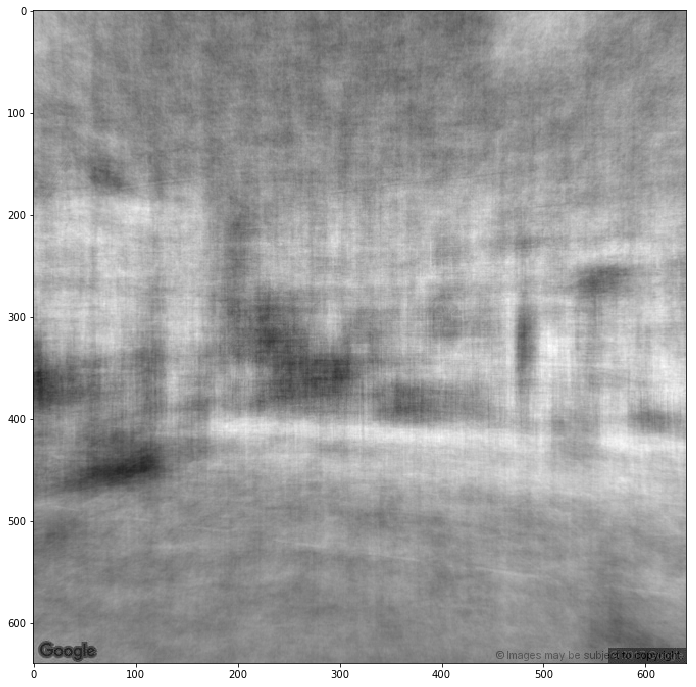

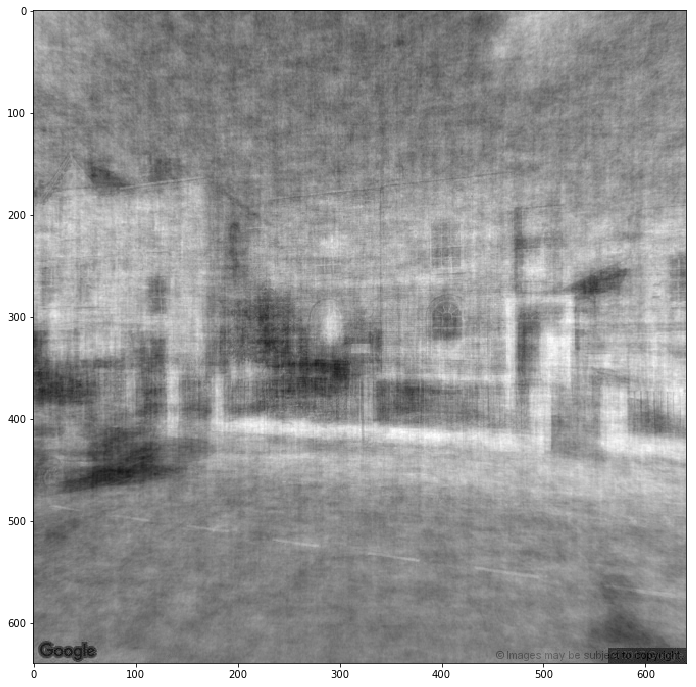

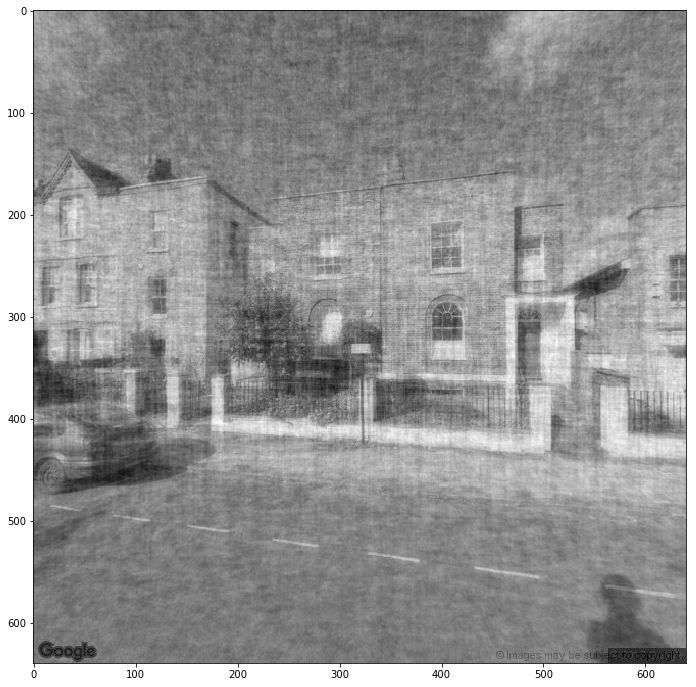

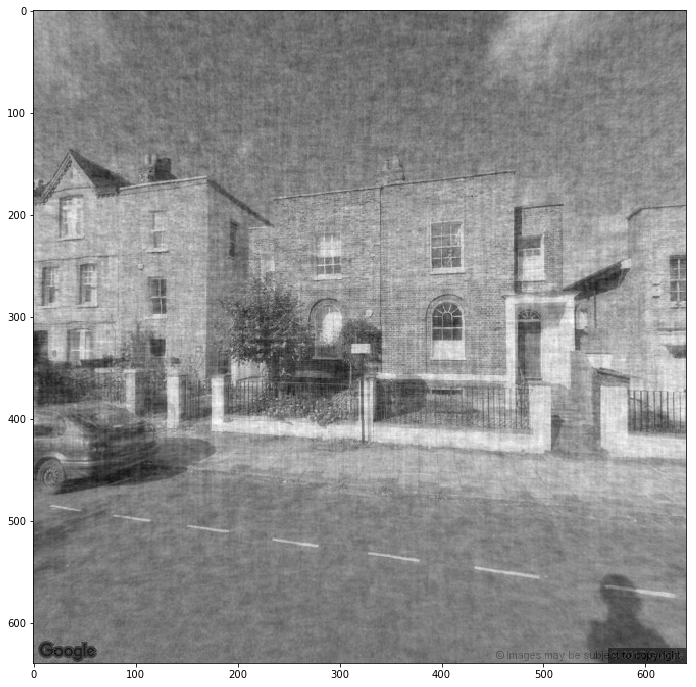

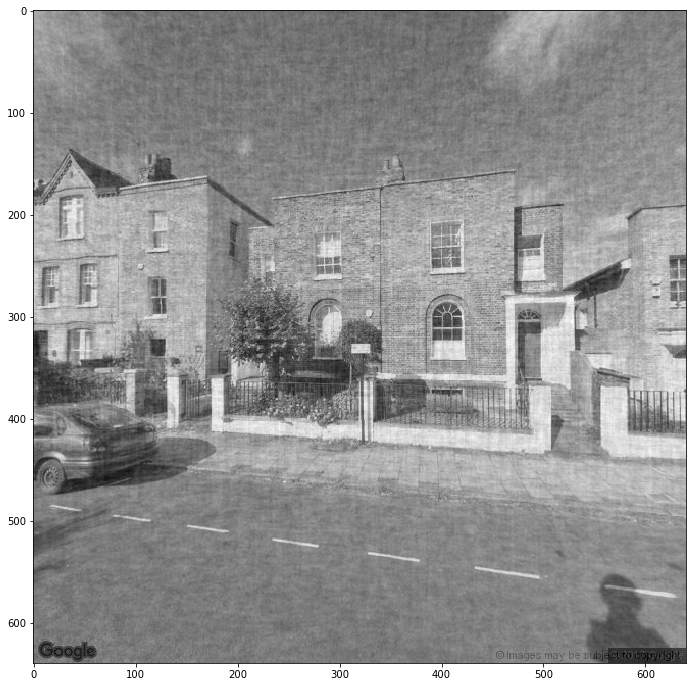

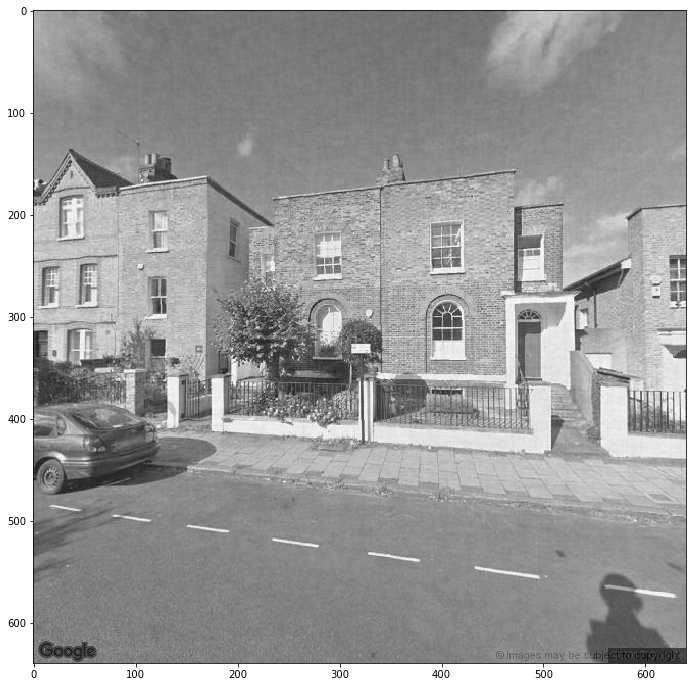

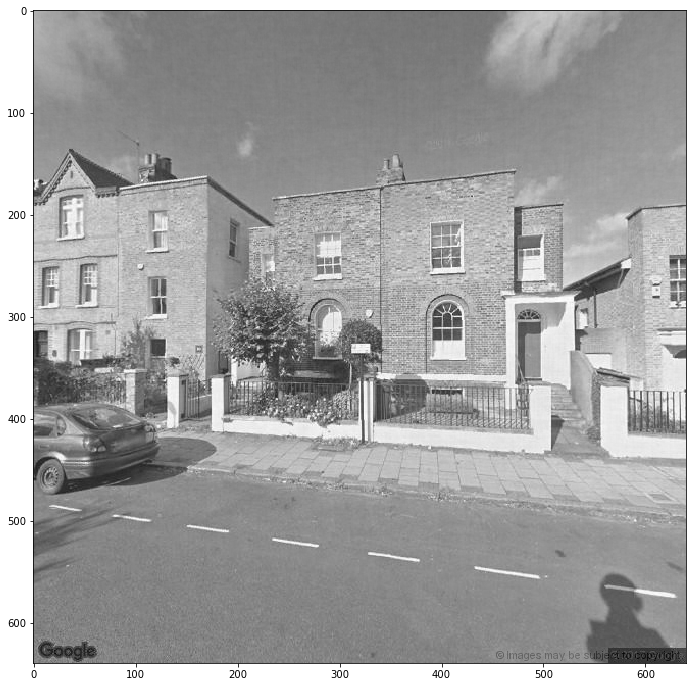

In [3]:
from matplotlib import pyplot as plt

#The number of principal components the images are projected upon
dimensions=[4,400,800,1600,2000,2500,3500,3900]

for x in dimensions:
       #Projects the data onto the first x eigenvectors, gets the projection coefficients
       tmp = dot(V[:x],immatrix[1000]) #Gives a vector x elements long with the projection coefficients
       #computes the approximation to the original images by taking the weighted sum of the first x principle components
       #where weights provided by the projection coefficients
       a=np.matmul(V[:x].T, np.asmatrix(tmp).T)
       plt.figure(figsize=(12,12))
       plt.imshow(a.reshape(m,n))
       show()
       